# Discrimination and detection

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
#import pymc as pm
#import arviz as az
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy.stats import norm
import imageio
import warnings
import random
warnings.filterwarnings("ignore")

## Problem 7.2

Suppose the prior distribution and the posterior distribution are as in Fig. 7.2.
a) Calculate the likelihood ratio.
b) Does the sensory evidence alone (without the prior) indicate that the stimulus was s+ or s−?
c) Do the prior and the likelihood favor the same alternative?

In [26]:
posterior_S_neg = 0.55
posterior_S_pos = 0.45

prior_S_neg = 0.7
prior_S_pos = 0.3

d =  np.log(posterior_S_pos/posterior_S_neg)
prior_ratio = np.log(prior_S_pos/prior_S_neg)
likelihood_ratio = d/prior_ratio
likelihood_ratio

0.23683607010461172

In [28]:
d

-0.20067069546215124

In [30]:
prior_ratio

-0.8472978603872036

As we can see here, d or log posterior ratio is not positive, which means that the s- is favorable. but without considering the prior, log likelihood ratio is positive which favors the s positive. In that sense, the answer is no. without considering prior or with sensory evidence alone we cant indicate the true stimulus.

## Problem 7.3

In this problem, we explore the relationship between posterior probabilities and log
posterior ratio numerically.

### Part a

a) Create a vector of 99 possible posterior probabilities of s+, from 0.01 to 0.99 in steps of 0.01.
For each value, calculate the log posterior ratio d = log p(s=s+|x)
p(s=s−|x). Then plot this ratio as a
function of the posterior probability of s+. This should show that every posterior probability
corresponds to exactly one log posterior ratio and the other way round (we are dealing with
monotonic functions). Knowing one is as good as knowing the other.

In [85]:
pos_probability = np.arange(0.01,1, 0.01)

In [87]:
pos_probability

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [73]:
d = np.log(pos_probability/(1 - pos_probability))
len(d)

99

Text(0, 0.5, 'Log posterior ratio')

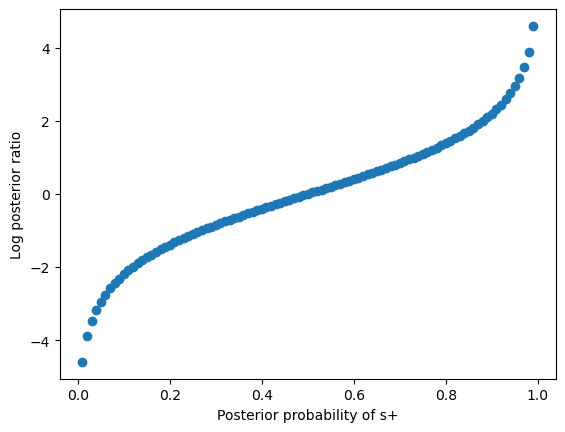

In [83]:
plt.scatter(pos_probability, d)
plt.xlabel('Posterior probability of s+')
plt.ylabel('Log posterior ratio')

### Part b

b) Why did we not include the posterior probabilities 0 and 1?

The denominator of the fraction cannot be zero.

### Part c

c) Suppose you know the log posterior ratio d. Express the posterior probability of s = s+,
p(s = s+|x), as a function of d only. Do the same for p(s = s−|x).

page 148

### Part d

d) If the log posterior ratio is 0.1, what are the posterior probabilities of s+ and s−? What if the
log posterior ratio is 1?

In [103]:
d = 0.1

In [105]:
p_s_positive = 1/(1+np.exp(-d))
p_s_negative = 1/(1+np.exp(d))
posteriors = [p_s_positive, p_s_negative]
posteriors

[0.52497918747894, 0.47502081252106]

In [107]:
d = 1

In [109]:
p_s_positive = 1/(1+np.exp(-d))
p_s_negative = 1/(1+np.exp(d))
posteriors = [p_s_positive, p_s_negative]
posteriors

[0.7310585786300049, 0.2689414213699951]

## Problem 7.4 

We formulated the decision rule as reporting one alternative d > 0 and the other whend < 0. Why does the case d(x) = 0 usually not have to be considered? What would the observer dowhen d(x) = 0?

In [113]:
# lets see what happens first
d = 0

In [115]:
p_s_positive = 1/(1+np.exp(-d))
p_s_negative = 1/(1+np.exp(d))
posteriors = [p_s_positive, p_s_negative]
posteriors

[0.5, 0.5]

In this case the posteriors must be equal. Although this might not happen frequently, having the same probabilities for two options yeilds a random like decision (at least for me!).

## Problem 7.6 

Suppose the stimulus s can take two values: s+ = 1◦ and s− = −1◦. Suppose that the
measurement is normally distributed around s with standard deviation 0.5◦. On a given trial, the
observer’s measurement is −0.1◦, and s = s+ occurs on 80% of trials. Would an optimal observer
report that the stimulus was s+ or s−? Provide all the steps in your reasoning.

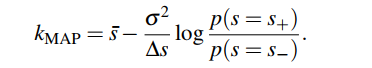

(array([ 4.,  4.,  3., 17., 25., 14., 16.,  7.,  6.,  4.]),
 array([-2.23651843, -2.00777881, -1.77903919, -1.55029957, -1.32155994,
        -1.09282032, -0.8640807 , -0.63534108, -0.40660146, -0.17786184,
         0.05087779]),
 <BarContainer object of 10 artists>)

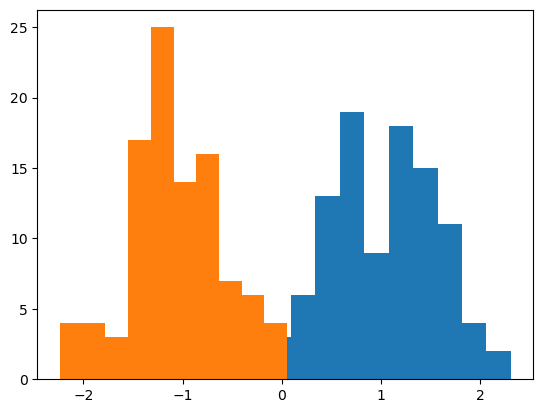

In [144]:
sigma = 0.5
S_pos_dis = np.random.normal(1, sigma, 100)
S_neg_dis = np.random.normal(-1, sigma, 100)


plt.hist(S_pos)
plt.hist(S_neg)

In [140]:
prior_ratio = np.log(80/20)
delta_s = 2 #s_pos - s_neg
s = 0
x = -0.1
var = 0.5**2
k_map = s - (var/delta_s) * prior_ratio

if k_map>x:
    print("simulus is s positive")
else:
    print("Simulus is negative")

Simulus is negative


In [142]:
k_map

-0.17328679513998632